# XYZ Simulation in XY mode

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

import pulser
from pulser import Pulse, Sequence, Register
from pulser.simulation import Simulation
from pulser.devices import MockDevice
from pulser.waveforms import BlackmanWaveform

Floquet Engineering on two atoms

In [14]:
coords = np.array([[0, 0], [30, 0]])
qubits = dict(enumerate(coords))
reg = Register(qubits)
seq = Sequence(reg, MockDevice)
seq.declare_channel('MW', 'mw_global')
seq.set_magnetic_field(0., 0., 1.)

In [15]:
t_pulse=26
Floquet_X_pulse = Pulse.ConstantDetuning(BlackmanWaveform(t_pulse, np.pi/2.), 0, 0)
Floquet_Y_pulse = Pulse.ConstantDetuning(BlackmanWaveform(t_pulse, np.pi/2.), 0, -np.pi/2)
Floquet_mX_pulse = Pulse.ConstantDetuning(BlackmanWaveform(t_pulse, np.pi/2.), 0, np.pi)
Floquet_mY_pulse = Pulse.ConstantDetuning(BlackmanWaveform(t_pulse, np.pi/2.), 0, np.pi/2)

In [16]:
tc = 300
tau_1 = tau_2 = tau_3 = tc/6.
t_half = t_pulse/2.

In [17]:
seq.delay(900, 'MW')

seq.delay(tau_1-t_half, 'MW')
seq.add(Floquet_X_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mY_pulse, 'MW')
seq.delay(2*tau_3-2*t_half, 'MW')
seq.add(Floquet_Y_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mX_pulse, 'MW')
seq.delay(tau_1-t_half, 'MW')

seq.delay(tau_1-t_half, 'MW')
seq.add(Floquet_X_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mY_pulse, 'MW')
seq.delay(2*tau_3-2*t_half, 'MW')
seq.add(Floquet_Y_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mX_pulse, 'MW')
seq.delay(tau_1-t_half, 'MW')

seq.delay(tau_1-t_half, 'MW')
seq.add(Floquet_X_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mY_pulse, 'MW')
seq.delay(2*tau_3-2*t_half, 'MW')
seq.add(Floquet_Y_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mX_pulse, 'MW')
seq.delay(tau_1-t_half, 'MW')

seq.delay(tau_1-t_half, 'MW')
seq.add(Floquet_X_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mY_pulse, 'MW')
seq.delay(2*tau_3-2*t_half, 'MW')
seq.add(Floquet_Y_pulse, 'MW')
seq.delay(tau_2-2*t_half, 'MW')
seq.add(Floquet_mX_pulse, 'MW')
seq.delay(tau_1-t_half, 'MW')


seq.delay(2*900, 'MW')   
t_list = [0]
t_list.append([0.300*p-0.001 for p in range(1, 14)])
print(t_list)

[0, [0.299, 0.599, 0.8989999999999999, 1.199, 1.499, 1.799, 2.099, 2.399, 2.699, 2.999, 3.299, 3.5989999999999998, 3.899]]


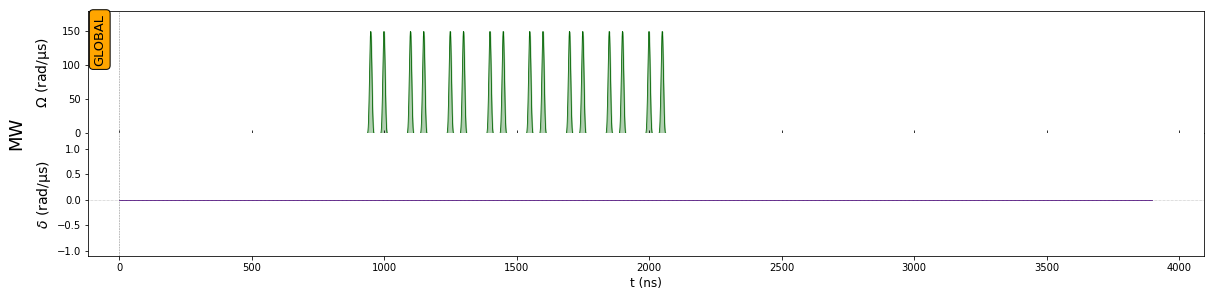

3900

In [18]:
seq.draw()
seq.get_duration()

In [19]:
sim = Simulation(seq, sampling_rate=1.0, config=None, evaluation_times=t_list)
sim.initial_state(plap)

/Users/loichenriet/Pasqal_code/Pulser/env_xyz_quantum_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: '>=' not supported between instances of 'int' and 'list'